# Central limit theorem (or why errors often look Gaussian)

The central limit theorem (CLT) is the reason sums or averages of measurements appear to be well-described by a Gaussian.

Suppose we have $N$ random variables $X_n$ from an distribution with finite variance.

The central limit theorem states that the sample mean $S_N$ approaches a Gaussian distribution with the same mean and variance as the measurements $X_N$.
That is, if the mean and variance of $X_n$ are given by $E[X_n] = \mu$ and $\mathrm{var}[X_n] = \sigma^2$, respectively, then the sample mean $S_N$ of $N$ measurements
$$S_N = \frac{1}{N} \sum_{n=1}^N X_n \rightarrow N(\mu, \sigma^2/N)$$
where $N(\mu, \sigma^2/N)$ denotes the normal (Gaussian) distribution with mean $\mu$ and variance $\sigma^2/N$:    
$$p(S_N | \mu, \sigma^2/N) = \frac{1}{\sqrt{2 \pi} \sigma} \exp\left[-\frac{(S_N - \mu)^2}{2 \sigma^2/N}\right]$$

This also means that the variance of the sample mean $S_N$ shrinks as $N^{-1}$ as the sample size $N$ grows!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def sample(N, sample_size=100000):
    X_n = np.random.gumbel(1.5, 3.0, [sample_size, N])
    return X_n[:,:].mean(axis=1)

def show_gaussian_fit(sample, bins):
    mu = sample.mean()
    sigma = sample.std()
    a = sample.size * (bins[1] - bins[0])
    
    fig,ax = plt.subplots()
    ax.hist(sample, bins);
    # show_gaussian_fit(S_N, bins);
    ax.plot(bins, a/(np.sqrt(2*np.pi)*sigma) * np.exp(-(bins-mu)**2 / (2*sigma**2)), 'r-')
    ax.get_yaxis().set_ticks([]); # turn off y ticks
    # Label plot.
    ax.set_xlabel('x');
    ax.set_ylabel('p(x)');

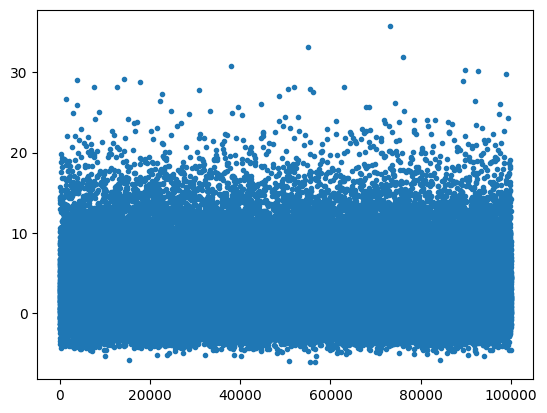

In [3]:
X_n = sample(1)
plt.figure()
plt.plot(X_n,'.')

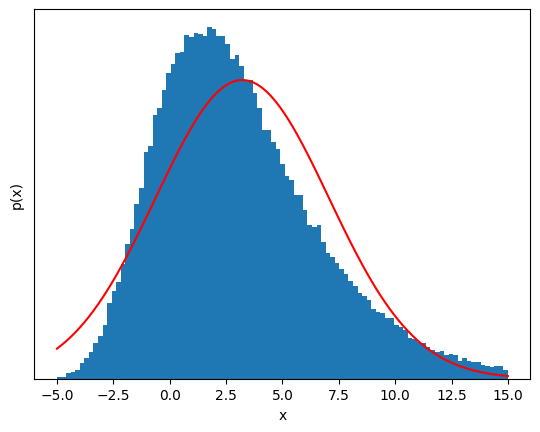

In [4]:
# Plot the distribution of X_n and the Gaussian fit for comparison
bins = np.linspace(-5, 15, 100);

show_gaussian_fit(X_n, bins);

###  But if we sum a few of these variables, the distribution starts to look Gaussian!

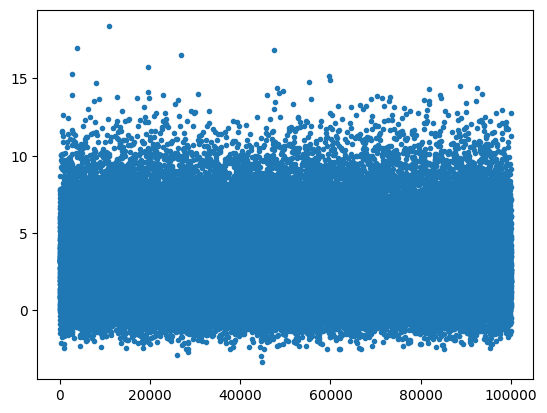

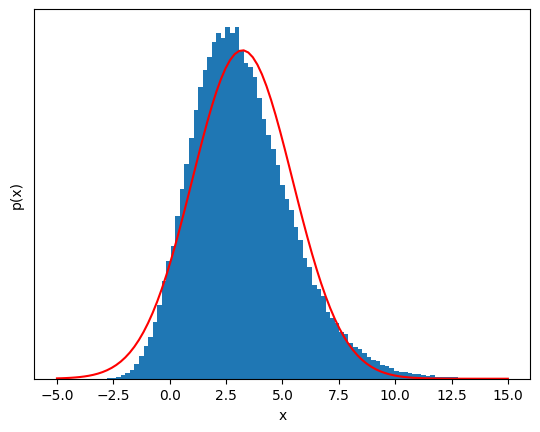

In [5]:
S_n = sample(3)

plt.figure()
plt.plot(S_n,'.')

show_gaussian_fit(sample(3), bins);

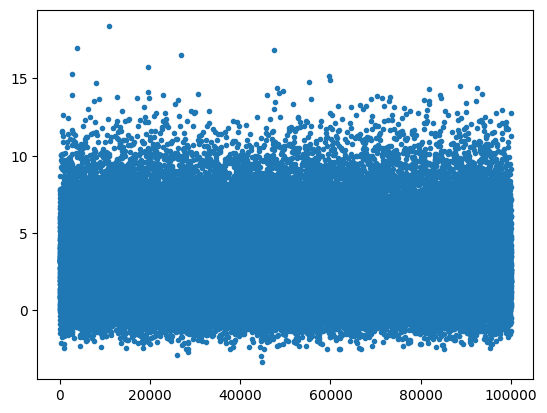

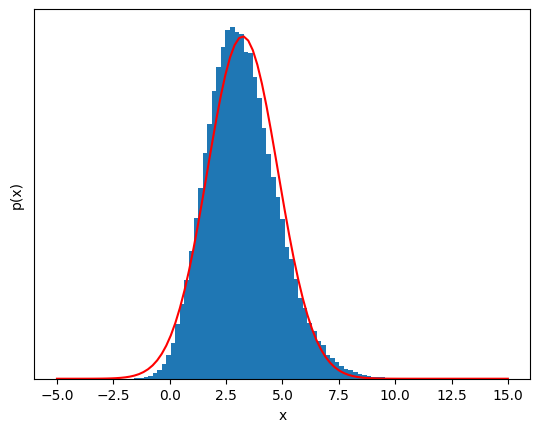

In [6]:
S_N = sample(6);

plt.figure()
plt.plot(S_n,'.')

show_gaussian_fit(S_N, bins);


## 20 samples, the distribution is almost impossible to distinguish from a Guassian.

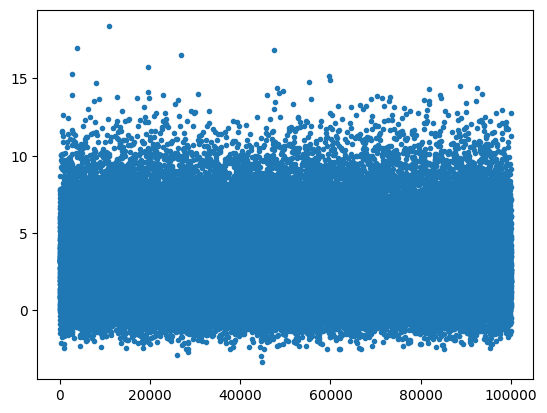

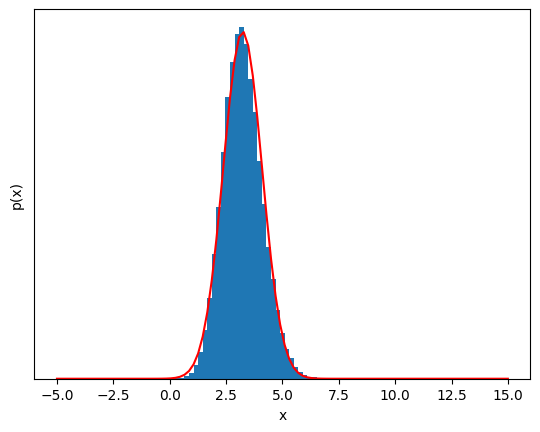

In [7]:
S_N = sample(20);
plt.figure()
plt.plot(S_n,'.')
show_gaussian_fit(S_N, bins);


## This is almost Gaussian!

The most amazing thing is that this works for any random variable $X_n$ as long as its variance is finite---it can be extremely non-Gaussian and it will still eventually look Gaussian!

The take-away message is this:
If there is some summing or averaging of independent, identically distributed data in your measurement, that new variable will likely be well-described by a Gaussian model.

## References and further reading

More information about the CLT can be found on Wikipedia:
http://en.wikipedia.org/wiki/Central_limit_theorem